<a href="https://colab.research.google.com/github/stav-aizik/eda_project/blob/main/eda_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
qqq = yf.download('QQQ',start = '2024-1-1', end = '2024-12-29')

[*********************100%***********************]  1 of 1 completed


In [ ]:
type(qqq)

pandas.core.frame.DataFrame

In [ ]:
qqq.head()

Price,Close,High,Low,Open,Volume
Ticker,QQQ,QQQ,QQQ,QQQ,QQQ
Date,,,,,
2024-01-02,400.211639,403.690963,397.875516,403.442440,58026900
2024-01-03,395.976837,398.631077,395.539464,397.567391,47002800
2024-01-04,393.938965,397.229409,393.720263,394.098023,39432800
2024-01-05,394.406158,397.199556,393.004485,394.107943,44867900
2024-01-08,402.557770,402.846035,395.489756,395.638864,42473800


In [ ]:
qqq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-01-02 to 2024-12-27
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, QQQ)   250 non-null    float64
 1   (High, QQQ)    250 non-null    float64
 2   (Low, QQQ)     250 non-null    float64
 3   (Open, QQQ)    250 non-null    float64
 4   (Volume, QQQ)  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


In [ ]:
qqq.tail()

Price,Close,High,Low,Open,Volume
Ticker,QQQ,QQQ,QQQ,QQQ,QQQ
Date,,,,,
2024-12-20,517.824951,523.975068,508.470072,509.618214,60530000
2024-12-23,522.869995,523.250000,516.130005,519.549988,29672800
2024-12-24,529.960022,530.049988,524.190002,524.830017,17558200
2024-12-26,529.599976,531.239990,526.309998,528.320007,19090500
2024-12-27,522.559998,526.450012,517.859985,526.010010,33839600


In [ ]:
qqq.index

DatetimeIndex(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-16',
               ...
               '2024-12-13', '2024-12-16', '2024-12-17', '2024-12-18',
               '2024-12-19', '2024-12-20', '2024-12-23', '2024-12-24',
               '2024-12-26', '2024-12-27'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

In [ ]:
qqq.columns

MultiIndex([( 'Close', 'QQQ'),
            (  'High', 'QQQ'),
            (   'Low', 'QQQ'),
            (  'Open', 'QQQ'),
            ('Volume', 'QQQ')],
           names=['Price', 'Ticker'])

In [ ]:
qqq.columns.get_level_values(0)

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [ ]:
qqq.columns = qqq.columns.get_level_values(0)

In [ ]:
qqq.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,400.211639,403.690963,397.875516,403.442440,58026900
2024-01-03,395.976837,398.631077,395.539464,397.567391,47002800
2024-01-04,393.938965,397.229409,393.720263,394.098023,39432800
2024-01-05,394.406158,397.199556,393.004485,394.107943,44867900
2024-01-08,402.557770,402.846035,395.489756,395.638864,42473800


3.1

In [ ]:
qqq.loc[['2024-03-01']]

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-03-01,442.977509,443.941779,437.241606,437.301249,43809200


In [ ]:
qqq[['Open']][qqq.index.is_quarter_start]

Price,Open
Date,
2024-04-01,442.926239
2024-07-01,478.594650
2024-10-01,486.914850


In [ ]:
qqq['month_p'] = qqq.index.to_period('M')

In [ ]:
qqq.head()

Price,Close,High,Low,Open,Volume,month_p
Date,,,,,,
2024-01-02,400.211639,403.690963,397.875516,403.442440,58026900,2024-01
2024-01-03,395.976837,398.631077,395.539464,397.567391,47002800,2024-01
2024-01-04,393.938965,397.229409,393.720263,394.098023,39432800,2024-01
2024-01-05,394.406158,397.199556,393.004485,394.107943,44867900,2024-01
2024-01-08,402.557770,402.846035,395.489756,395.638864,42473800,2024-01


In [ ]:
group_month = qqq.groupby('month_p')

In [ ]:
group_month.mean()

Price,Close,High,Low,Open,Volume
month_p,,,,,
2024-01,410.634978,412.605176,408.009155,410.102904,4.632945e+07
2024-02,429.803322,431.414247,426.955246,429.357969,4.331146e+07
2024-03,439.267816,441.829261,436.841475,439.736548,4.523888e+07
2024-04,430.651947,434.270248,427.848520,431.736937,4.847282e+07
2024-05,444.750979,446.555384,441.929452,444.321597,3.320852e+07
2024-06,471.006947,473.045234,467.907818,470.222228,2.897909e+07
2024-07,480.819275,484.915995,477.845078,482.118081,3.643311e+07
2024-08,462.782381,467.182725,458.220699,462.665463,4.129935e+07
2024-09,472.026529,475.278089,468.129543,472.408108,3.473981e+07


In [ ]:
group_month.mean().loc[['2024-04']]

Price,Close,High,Low,Open,Volume
month_p,,,,,
2024-04,430.651947,434.270248,427.84852,431.736937,4.847282e+07


In [ ]:
#3.2

In [ ]:
qqq.describe()

Price,Close,High,Low,Open,Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,462.838630,465.659511,459.678120,462.919609,3.715217e+07
std,33.218542,33.321528,33.072720,33.300453,1.268441e+07
min,393.938965,397.199556,393.004485,394.098023,1.533400e+07
25%,436.212631,439.384808,433.384207,436.113881,2.658928e+07
50%,461.214432,464.242962,456.790467,461.333967,3.452965e+07
75%,488.277641,490.663806,484.671740,487.888264,4.449120e+07
max,537.303589,538.282053,533.270084,535.496474,8.748350e+07


In [ ]:
group_month.describe()

Price   Close                                                             \
        count        mean        std         min         25%         50%   
month_p                                                                    
2024-01  21.0  410.634978  10.389823  393.938965  403.352997  407.140503   
2024-02  20.0  429.803322   4.751384  419.387726  425.993469  430.447006   
2024-03  20.0  439.267816   3.889865  431.356628  436.369324  441.161438   
2024-04  22.0  430.651947   8.806413  412.745483  423.309227  429.941147   
2024-05  22.0  444.750979  10.064575  419.583923  438.471771  449.057907   
2024-06  19.0  471.006947  10.071051  451.048737  462.047989  474.530396   
2024-07  22.0  480.819275  14.215616  456.152405  470.690994  480.668381   
2024-08  22.0  462.782381  15.649382  433.460907  449.295601  469.586838   
2024-09  20.0  472.026529  12.528743  447.339020  460.227600  471.939728   
2024-10  23.0  490.113163   5.560844  480.495178  487.054611  491.527405   
2024-11  20.0  503.764169   8.381013  485.227570  501.573715  504.870895   
2024-12  19.0  523.644779   6.829135  513.342224  518.793396  522.559998   

Price                            High              ...        Open  \
                75%         max count        mean  ...         75%   
month_p                                            ...               
2024-01  420.978271  425.620697  21.0  412.605176  ...  420.908716   
2024-02  434.028175  436.406616  20.0  431.414247  ...  433.232936   
2024-03  442.734589  444.329742  20.0  441.829261  ...  443.027231   
2024-04  438.543945  443.324371  22.0  434.270248  ...  438.864970   
2024-05  452.509499  457.568665  22.0  446.555384  ...  452.638934   
2024-06  478.449051  482.981384  19.0  473.045234  ...  477.966092   
2024-07  494.324631  501.445618  22.0  484.915995  ...  494.033002   
2024-08  474.604172  481.047211  22.0  467.182725  ...  474.576764   
2024-09  482.843918  488.682007  20.0  475.278089  ...  482.549395   
2024-10  494.562515  499.354797  23.0  493.048431  ...  494.632411   
2024-11  509.545837  513.312317  20.0  505.846313  ...  509.580782   
2024-12  529.333405  537.303589  19.0  526.868518  ...  527.575253   

Price               Volume                                          \
                max  count          mean           std         min   
month_p                                                              
2024-01  425.829435   21.0  4.632945e+07  1.017287e+07  33003800.0   
2024-02  437.052717   20.0  4.331146e+07  1.004192e+07  29889900.0   
2024-03  446.818267   20.0  4.523888e+07  1.218828e+07  27789200.0   
2024-04  444.279967   22.0  4.847282e+07  1.094236e+07  28144900.0   
2024-05  458.434663   22.0  3.320852e+07  9.472180e+06  22994200.0   
2024-06  484.185852   19.0  2.897909e+07  6.200064e+06  20719800.0   
2024-07  501.555295   22.0  3.643311e+07  1.256070e+07  18064900.0   
2024-08  483.380168   22.0  4.129935e+07  1.574270e+07  23737700.0   
2024-09  492.575722   20.0  3.473981e+07  1.004876e+07  22585600.0   
2024-10  498.586035   23.0  2.870332e+07  6.469170e+06  20477800.0   
2024-11  514.540261   20.0  2.838649e+07  7.856970e+06  15334000.0   
2024-12  535.496474   19.0  2.966892e+07  1.206291e+07  17558200.0   

Price                                                    
                25%         50%         75%         max  
month_p                                                  
2024-01  39132900.0  44367200.0  54386000.0  70268500.0  
2024-02  35312875.0  39871550.0  51671825.0  64491700.0  
2024-03  37656425.0  43731350.0  48541650.0  73038800.0  
2024-04  42322650.0  47084200.0  56341125.0  75136600.0  
2024-05  25394200.0  30470650.0  36370175.0  55941300.0  
2024-06  23570000.0  26222100.0  34225650.0  39432900.0  
2024-07  26143850.0  34130400.0  43924800.0  59256800.0  
2024-08  30273600.0  37556000.0  46187950.0  87483500.0  
2024-09  28471325.0  32262650.0  39975775.0  57843000.0  
2024-10  24985050.0  26685800.0  30511550.0  42735400.0  
202

In [ ]:
Open = group_month.describe()['Open'][['max','min','mean']]

In [ ]:
Close = group_month.describe()['Close'][['max','min','mean']]

In [ ]:
Volume = group_month.describe()['Volume'][['max','min','mean']]

In [ ]:
concat_values = pd.concat([Open,Close,Volume],keys=['O','C','V'])

In [ ]:
concat_values

max           min          mean
  month_p                                          
O 2024-01  4.258294e+02  3.940980e+02  4.101029e+02
  2024-02  4.370527e+02  4.163160e+02  4.293580e+02
  2024-03  4.468183e+02  4.334499e+02  4.397365e+02
  2024-04  4.442800e+02  4.153933e+02  4.317369e+02
  2024-05  4.584347e+02  4.212064e+02  4.443216e+02
  2024-06  4.841859e+02  4.507899e+02  4.702222e+02
  2024-07  5.015553e+02  4.612570e+02  4.821181e+02
  2024-08  4.833802e+02  4.234312e+02  4.626655e+02
  2024-09  4.925757e+02  4.516959e+02  4.724081e+02
  2024-10  4.985860e+02  4.789676e+02  4.906844e+02
  2024-11  5.145403e+02  4.847184e+02  5.031771e+02
  2024-12  5.354965e+02  5.096182e+02  5.234556e+02
C 2024-01  4.256207e+02  3.939390e+02  4.106350e+02
  2024-02  4.364066e+02  4.193877e+02  4.298033e+02
  2024-03  4.443297e+02  4.313566e+02  4.392678e+02
  2024-04  4.433244e+02  4.127455e+02  4.306519e+02
  2024-05  4.575687e+02  4.195839e+02  4.447510e+02
  2024-06  4.829814e+02  4.510487e+02  4.710069e+02
  2024-07  5.014456e+02  4.561524e+02  4.808193e+02
  2024-08  4.810472e+02  4.334609e+02  4.627824e+02
  2024-09  4.886820e+02  4.473390e+02  4.720265e+02
  2024-10  4.993548e+02  4.804952e+02  4.901132e+02
  2024-11  5.133123e+02  4.852276e+02  5.037642e+02
  2024-12  5.373036e+02  5.133422e+02  5.236448e+02
V 2024-01  7.026850e+07  3.300380e+07  4.632945e+07
  2024-02  6.449170e+07  2.988990e+07  4.331146e+07
  2024-03  7.303880e+07  2.778920e+07  4.523888e+07
  2024-04  7.513660e+07  2.814490e+07  4.847282e+07
  2024-05  5.594130e+07  2.299420e+07  3.320852e+07
  2024-06  3.943290e+07  2.071980e+07  2.897909e+07
  2024-07  5.925680e+07  1.806490e+07  3.643311e+07
  2024-08  8.748350e+07  2.373770e+07  4.129935e+07
  2024-09  5.784300e+07  2.258560e+07  3.473981e+07
  2024-10  4.273540e+07  2.047780e+07  2.870332e+07
  2024-11  5.146110e+07  1.533400e+07  2.838649e+07
  2024-12  6.053000e+07  1.755820e+07  2.966892e+07

<function matplotlib.pyplot.show(close=None, block=None)>

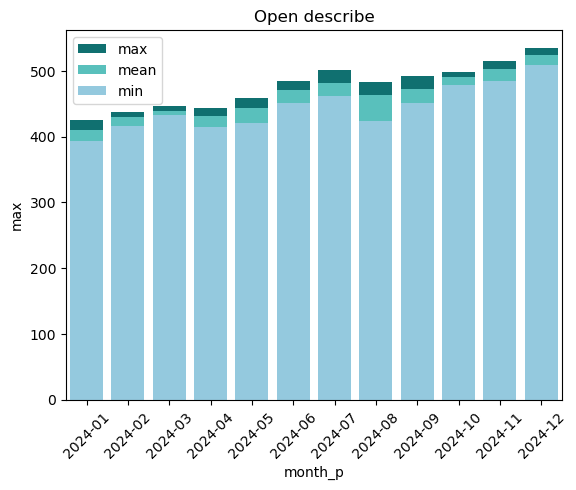

In [ ]:
plt.title('Open describe')
sns.barplot(x='month_p',y='max' , data = Open , color= 'teal',label = 'max')
sns.barplot(x='month_p',y='mean' , data = Open, color= 'mediumturquoise',label = 'mean')
sns.barplot(x='month_p',y='min' , data = Open, color= 'skyblue',label = 'min')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

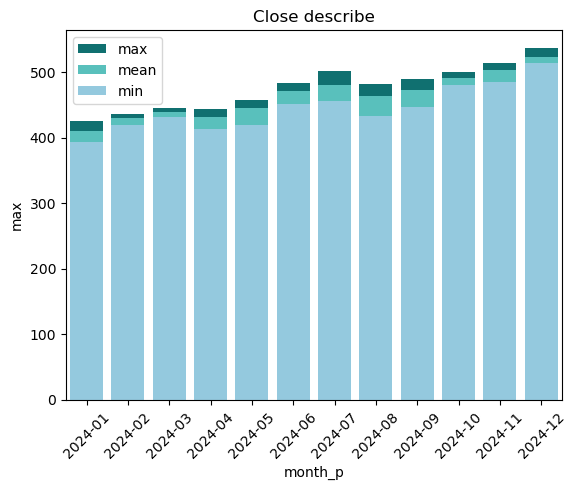

In [ ]:
plt.title('Close describe')
sns.barplot(x='month_p',y='max' , data = Close , color= 'teal',label = 'max')
sns.barplot(x='month_p',y='mean' , data = Close, color= 'mediumturquoise',label = 'mean')
sns.barplot(x='month_p',y='min' , data = Close , color= 'skyblue',label = 'min')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

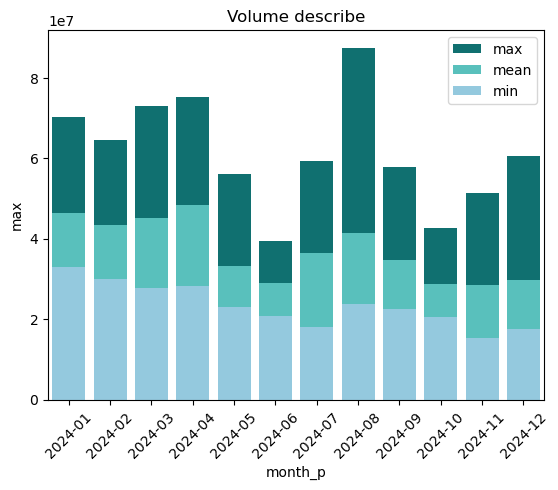

In [ ]:
plt.title('Volume describe')
sns.barplot(x='month_p',y='max' , data = Volume , color= 'teal',label = 'max')
sns.barplot(x='month_p',y='mean' , data = Volume, color= 'mediumturquoise',label = 'mean')
sns.barplot(x='month_p',y='min' , data = Volume , color= 'skyblue',label = 'min')
plt.xticks(rotation=45)
plt.show

C:\Users\Tomer\AppData\Local\Temp\ipykernel_20504\26499138.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0].set_xticklabels(axis[0].get_xticklabels(),rotation=45)
C:\Users\Tomer\AppData\Local\Temp\ipykernel_20504\26499138.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1].set_xticklabels(axis[1].get_xticklabels(),rotation=45)
C:\Users\Tomer\AppData\Local\Temp\ipykernel_20504\26499138.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[2].set_xticklabels(axis[2].get_xticklabels(),rotation=45)


Text(0.5, 0, 'months')

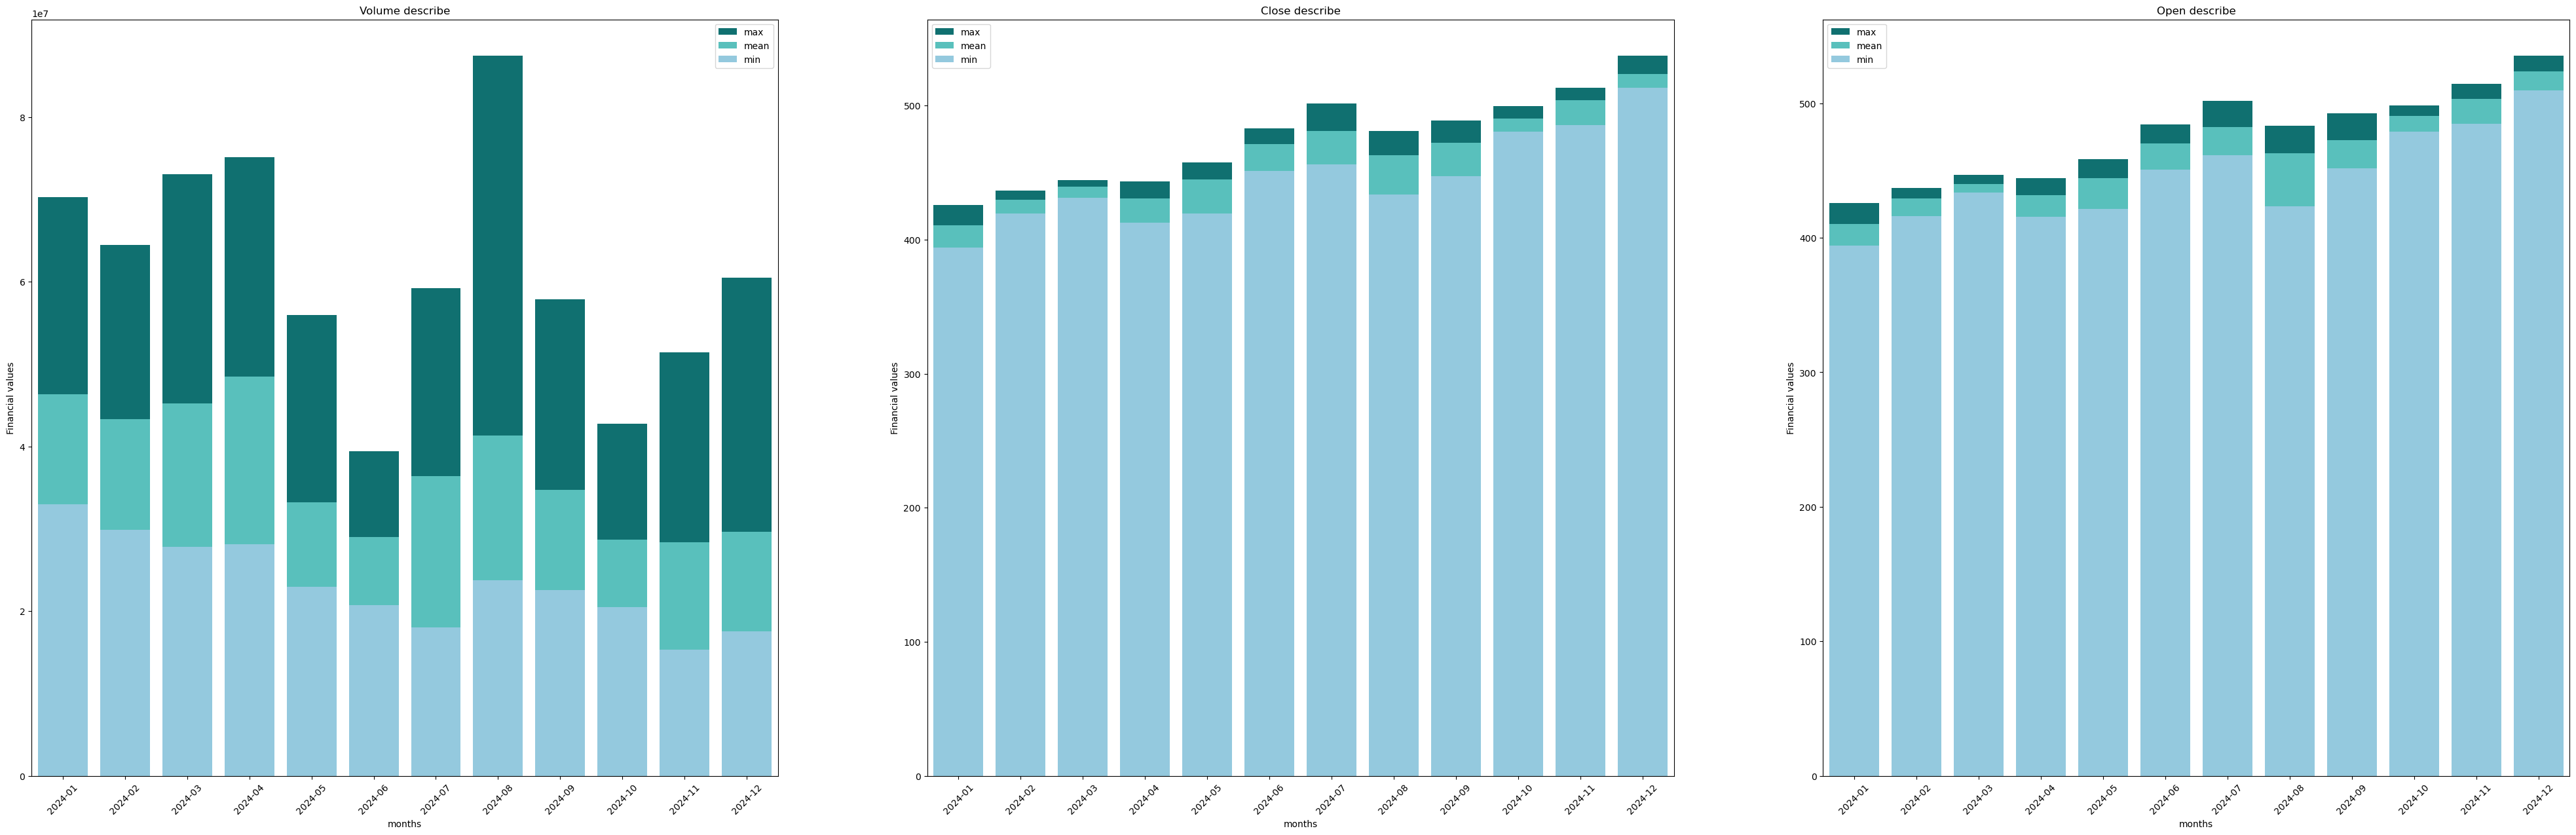

In [ ]:
figure,axis = plt.subplots(1,3,figsize=(50,15))
axis[0].set_title('Volume describe')
sns.barplot(x='month_p',y='max' , data = Volume , color= 'teal',label = 'max',ax=axis[0])
sns.barplot(x='month_p',y='mean' , data = Volume, color= 'mediumturquoise',label = 'mean',ax=axis[0])
sns.barplot(x='month_p',y='min' , data = Volume , color= 'skyblue',label = 'min',ax=axis[0])
axis[0].set_xticklabels(axis[0].get_xticklabels(),rotation=45)

axis[1].set_title('Close describe')
sns.barplot(x='month_p',y='max' , data = Close , color= 'teal',label = 'max',ax=axis[1])
sns.barplot(x='month_p',y='mean' , data = Close, color= 'mediumturquoise',label = 'mean',ax=axis[1])
sns.barplot(x='month_p',y='min' , data = Close , color= 'skyblue',label = 'min',ax=axis[1])
axis[1].set_xticklabels(axis[1].get_xticklabels(),rotation=45)

axis[2].set_title('Open describe')
sns.barplot(x='month_p',y='max' , data = Open , color= 'teal',label = 'max',ax=axis[2])
sns.barplot(x='month_p',y='mean' , data = Open, color= 'mediumturquoise',label = 'mean',ax=axis[2])
sns.barplot(x='month_p',y='min' , data = Open, color= 'skyblue',label = 'min',ax=axis[2])
axis[2].set_xticklabels(axis[2].get_xticklabels(),rotation=45)
plt.show

#שינוי שמות הצירים
axis[0].set_ylabel("Financial values")
axis[1].set_ylabel("Financial values")
axis[2].set_ylabel("Financial values")
axis[0].set_xlabel("months")
axis[1].set_xlabel("months")
axis[2].set_xlabel("months")

In [ ]:
qqq['day of week'] = qqq.index.day_of_week

In [ ]:
group_day = qqq.groupby('day of week')

In [ ]:
qqq.head()

Price,Close,High,Low,Open,Volume,month_p,day of week
Date,,,,,,,
2024-01-02,400.211639,403.690963,397.875516,403.442440,58026900,2024-01,1
2024-01-03,395.976837,398.631077,395.539464,397.567391,47002800,2024-01,2
2024-01-04,393.938965,397.229409,393.720263,394.098023,39432800,2024-01,3
2024-01-05,394.406158,397.199556,393.004485,394.107943,44867900,2024-01,4
2024-01-08,402.557770,402.846035,395.489756,395.638864,42473800,2024-01,0


In [ ]:
group_day.describe()

Price       Close                                                             \
            count        mean        std         min         25%         50%   
day of week                                                                    
0            47.0  465.258338  32.792976  402.557770  436.849258  462.695007   
1            52.0  462.560074  34.302446  400.211639  436.170418  458.994095   
2            50.0  460.794056  33.524134  395.976837  434.145142  461.368866   
3            50.0  461.692576  33.037185  393.938965  436.441406  458.963913   
4            51.0  464.020790  33.499671  394.406158  436.341736  461.576050   

Price                                High              ...        Open  \
                    75%         max count        mean  ...         75%   
day of week                                            ...               
0            490.943344  537.303589  47.0  467.534313  ...  489.246090   
1            488.899147  534.937378  52.0  464.838031  ...  486.847441   
2            486.939789  529.066833  50.0  463.854551  ...  486.296361   
3            482.779442  529.599976  50.0  465.271425  ...  488.591296   
4            489.605484  529.675903  51.0  466.919387  ...  489.830130   

Price                   Volume                                          \
                    max  count          mean           std         min   
day of week                                                              
0            532.221817   47.0  3.268186e+07  1.197656e+07  20477800.0   
1            535.496474   52.0  3.475855e+07  1.159278e+07  17558200.0   
2            534.288469   50.0  3.887927e+07  1.212955e+07  18064900.0   
3            528.320007   50.0  3.907242e+07  1.148915e+07  18169600.0   
4            529.606009   51.0  4.013660e+07  1.477050e+07  15334000.0   

Price                                                        
                    25%         50%         75%         max  
day of week                                                  
0            24936700.0  30022200.0  37402750.0  87483500.0  
1            25952100.0  30540250.0  42802575.0  64491700.0  
2            28426550.0  37820700.0  46989100.0  64010600.0  
3            30095950.0  39070900.0  47554925.0  59562500.0  
4            28946100.0  37109400.0  49569850.0  75136600.0  

[5 rows x 40 columns]

In [ ]:
Close_day = group_day.describe()['Close'][['max','50%','mean']]

In [ ]:
Close_day

,max,50%,mean
day of week,,,
0,537.303589,462.695007,465.258338
1,534.937378,458.994095,462.560074
2,529.066833,461.368866,460.794056
3,529.599976,458.963913,461.692576
4,529.675903,461.576050,464.020790


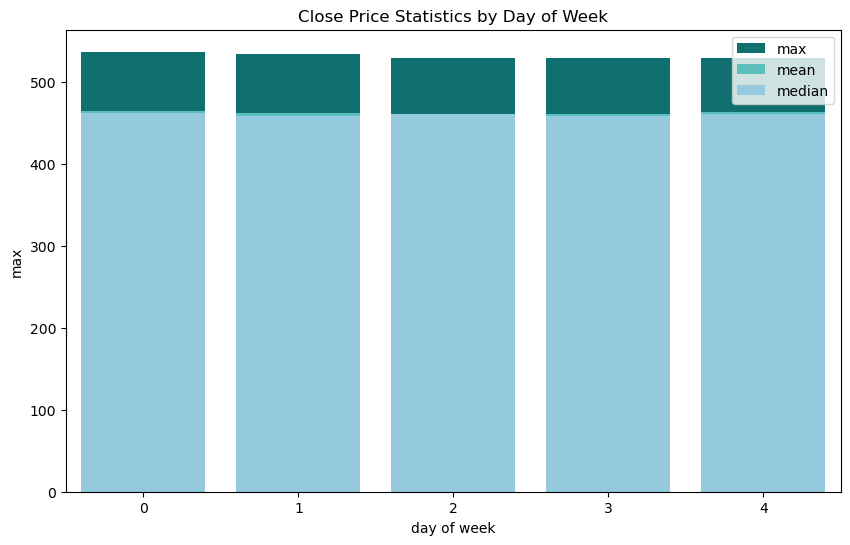

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Close Price Statistics by Day of Week')
sns.barplot(x='day of week',y='max' , data = Close_day , color= 'teal',label = 'max')
sns.barplot(x='day of week',y='mean' , data = Close_day, color= 'mediumturquoise',label = 'mean')
sns.barplot(x='day of week',y='50%' , data = Close_day , color= 'skyblue',label = 'median')
plt.legend()
plt.show()
#לא אהבתי את התוצאה בגלל שקשה לראות את ההבדלים אז שיניתי כדי שזה יציג את הברים אחד ליד השני ולא מעל

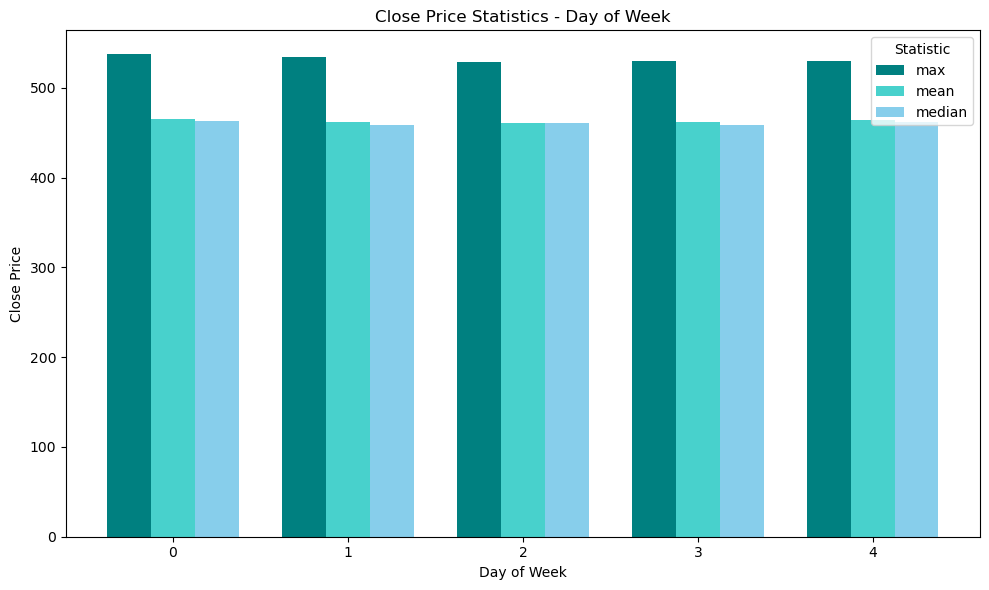

In [ ]:
days = Close_day.index
max_values = Close_day['max']
mean_values = Close_day['mean']
median_values = Close_day['50%']

x = np.arange(len(days))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, max_values, width, label='max', color='teal')
plt.bar(x, mean_values, width, label='mean', color='mediumturquoise')
plt.bar(x + width, median_values, width, label='median', color='skyblue')

plt.title('Close Price Statistics - Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Close Price')
plt.legend(title='Statistic')

plt.tight_layout()
plt.show()


<Axes: xlabel='Price', ylabel='Price'>

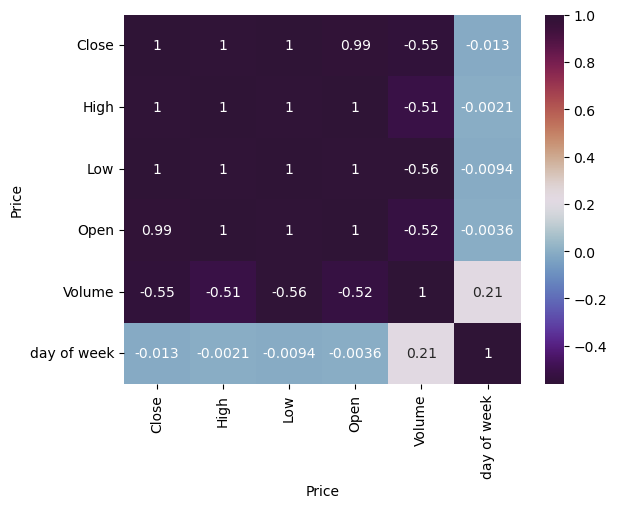

In [ ]:
df = qqq.select_dtypes(['number'])
sns.heatmap(df.corr(),annot=True,cmap='twilight_shifted')

<Axes: xlabel='Close', ylabel='High'>

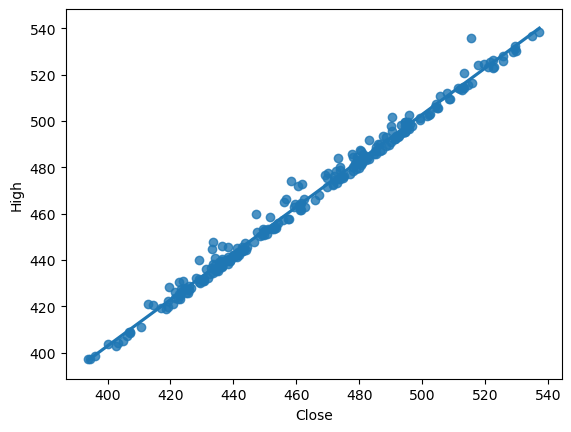

In [ ]:
sns.regplot(x='Close' , y='High' , data = qqq)

In [ ]:
#3.4

In [ ]:
quarter_start=qqq[qqq.index.is_quarter_start]

In [ ]:
quarter_start

Price,Close,High,Low,Open,Volume,month_p,day of week
Date,,,,,,,
2024-04-01,442.906342,445.474478,440.985183,442.926239,38729000,2024-04,0
2024-07-01,480.468994,481.037255,474.826032,478.594650,24898300,2024-07,0
2024-10-01,480.495178,487.214354,476.631414,486.914850,42735400,2024-10,1


In [ ]:
volum_quarter = quarter_start.Volume

In [ ]:
volum_quarter

Date
2024-04-01    38729000
2024-07-01    24898300
2024-10-01    42735400
Name: Volume, dtype: int64

<Axes: ylabel='Volume'>

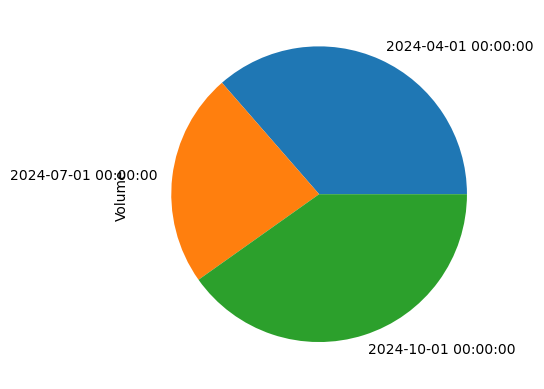

In [ ]:
volum_quarter.plot(kind='pie')

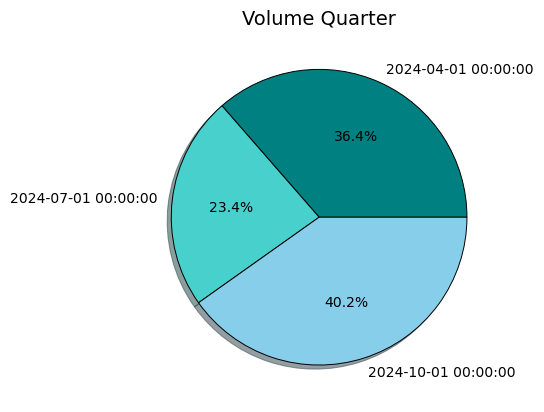

In [ ]:
plt.title('Volume Quarter', fontsize=14)
plt.pie(volum_quarter,labels = volum_quarter.index,
        wedgeprops = {'edgecolor' :'k',
                      'linewidth': 0.7} ,
        shadow = True ,
        colors = ['teal', 'mediumturquoise', 'skyblue'],
       autopct='%1.1f%%',
        )

plt.show()


In [ ]:
qqq['week_p'] = qqq.index.to_period('W')

In [ ]:
qqq.head()

Price,Close,High,Low,Open,Volume,month_p,day of week,week_p
Date,,,,,,,,
2024-01-02,400.211639,403.690963,397.875516,403.442440,58026900,2024-01,1,2024-01-01/2024-01-07
2024-01-03,395.976837,398.631077,395.539464,397.567391,47002800,2024-01,2,2024-01-01/2024-01-07
2024-01-04,393.938965,397.229409,393.720263,394.098023,39432800,2024-01,3,2024-01-01/2024-01-07
2024-01-05,394.406158,397.199556,393.004485,394.107943,44867900,2024-01,4,2024-01-01/2024-01-07
2024-01-08,402.557770,402.846035,395.489756,395.638864,42473800,2024-01,0,2024-01-08/2024-01-14


In [ ]:
group_week = qqq.groupby('week_p')

In [ ]:
group_week.describe()

Price                 Close                                                 \
                      count        mean        std         min         25%   
week_p                                                                       
2024-01-01/2024-01-07   4.0  396.133400   2.855139  393.938965  394.289360   
2024-01-08/2024-01-14   5.0  405.213959   2.117943  402.557770  403.352997   
2024-01-15/2024-01-21   4.0  410.286804   6.080641  404.804382  406.526627   
2024-01-22/2024-01-28   5.0  421.733795   1.862608  419.238647  420.978271   
2024-01-29/2024-02-04   5.0  421.755652   4.910061  414.506744  419.387726   
2024-02-05/2024-02-11   5.0  429.024463   3.761474  425.063995  425.918945   
2024-02-12/2024-02-18   5.0  429.883350   2.808739  426.018311  428.026398   
2024-02-19/2024-02-25   4.0  429.393242   6.350177  423.095642  424.370583   
2024-02-26/2024-03-03   5.0  436.213721   4.018988  432.698608  433.971008   
2024-03-04/2024-03-10   5.0  438.062750   3.903389  433.473999  436.197845   
2024-03-11/2024-03-17   5.0  436.279364   3.570932  431.356628  434.806122   
2024-03-18/2024-03-24   5.0  440.381958   4.123207  435.470642  436.555603   
2024-03-25/2024-03-31   4.0  442.189613   0.707930  441.283783  441.798927   
2024-04-01/2024-04-07   5.0  438.769403   3.481403  433.340454  438.446899   
2024-04-08/2024-04-14   5.0  438.942596   2.950100  436.256989  436.356537   
2024-04-15/2024-04-21   5.0  423.258966   6.752373  412.745483  421.465240   
2024-04-22/2024-04-28   5.0  423.217169   4.356974  416.896332  422.500519   
2024-04-29/2024-05-05   5.0  426.281018   5.740532  419.583923  422.639801   
2024-05-06/2024-05-12   5.0  438.717627   0.817762  438.038757  438.227875   
2024-05-13/2024-05-19   5.0  447.067120   4.341586  441.044891  443.881836   
2024-05-20/2024-05-26   5.0  453.513373   1.559192  451.576324  452.820557   
2024-05-27/2024-06-02   4.0  452.507004   4.208538  448.639832  449.266945   
2024-06-03/2024-06-09   5.0  457.361609   5.221836  451.048737  452.283051   
2024-06-10/2024-06-16   5.0  470.411389   5.975608  462.695007  465.870331   
2024-06-17/2024-06-23   4.0  480.761635   2.532552  477.974487  478.937553   
2024-06-24/2024-06-30   5.0  477.444092   2.914467  472.532928  477.667419   
2024-07-01/2024-07-07   4.0  487.552582   6.026933  480.468994  484.252548   
2024-07-08/2024-07-14   5.0  495.467670   4.070626  490.448822  493.330139   
2024-07-15/2024-07-21   5.0  484.335284   9.791142  473.809052  478.046295   
2024-07-22/2024-07-28   5.0  468.098334  11.081996  456.890167  461.576050   
2024-07-29/2024-08-04   5.0  458.796423   8.196690  447.398834  456.152405   
2024-08-05/2024-08-11   5.0  440.300281   7.210436  433.460907  434.059143   
2024-08-12/2024-08-18   5.0  463.827222   9.788685  450.020905  461.187164   
2024-08-19/2024-08-25   5.0  478.331421   2.915321  473.420258  478.554749   
2024-08-26/2024-09-01   5.0  472.648584   2.851246  469.242889  469.930786   
2024-09-02/2024-09-08   4.0  456.658371   6.232583  447.339020  456.252090   
2024-09-09/2024-09-15   5.0  464.656726   9.100188  453.091644  457.279022   
2024-09-16/2024-09-22   5.0  475.358405   5.622216  470.020538  471.815094   
2024-09-23/2024-09-29   5.0  485.307440   2.328294  482.262360  484.588593   
2024-09-30/2024-10-06   5.0  483.260730   3.350299  480.495178  480.814667   
2024-10-07/2024-10-13   5.0  489.310968   4.755995  481.323853  488.512268   
2024-10-14/2024-10-20   5.0  492.202325   2.930568  490.059784  490.119690   
2024-10-21/2024-10-27   5.0  492.681543   3.190936  487.573761  491.527405   
2024-10-28/2024-11-03   5.0  491.850885   6.744937  483.071045  486.645264   
2024-11-04/2024-11-10   5.0  501.487341  12.672611  485.227570  491.417572   
2024-11-11/2024-11-17   5.0  508.032788   7.125864  495.770569  507.871063   
2024-11-18/2024-11-24   5.0  502.673437   2.213089  499.214996  502.359955   
2024-11-25/2024-12-01   4.0  506.917572   2.136726  504.486481  505.452431   
2024-12-02/2024-12-08 

In [ ]:
close_week =  group_week.describe()['Close'][['mean']]

In [ ]:
close_week

,mean
week_p,
2024-01-01/2024-01-07,396.133400
2024-01-08/2024-01-14,405.213959
2024-01-15/2024-01-21,410.286804
2024-01-22/2024-01-28,421.733795
2024-01-29/2024-02-04,421.755652
2024-02-05/2024-02-11,429.024463
2024-02-12/2024-02-18,429.883350
2024-02-19/2024-02-25,429.393242
2024-02-26/2024-03-03,436.213721


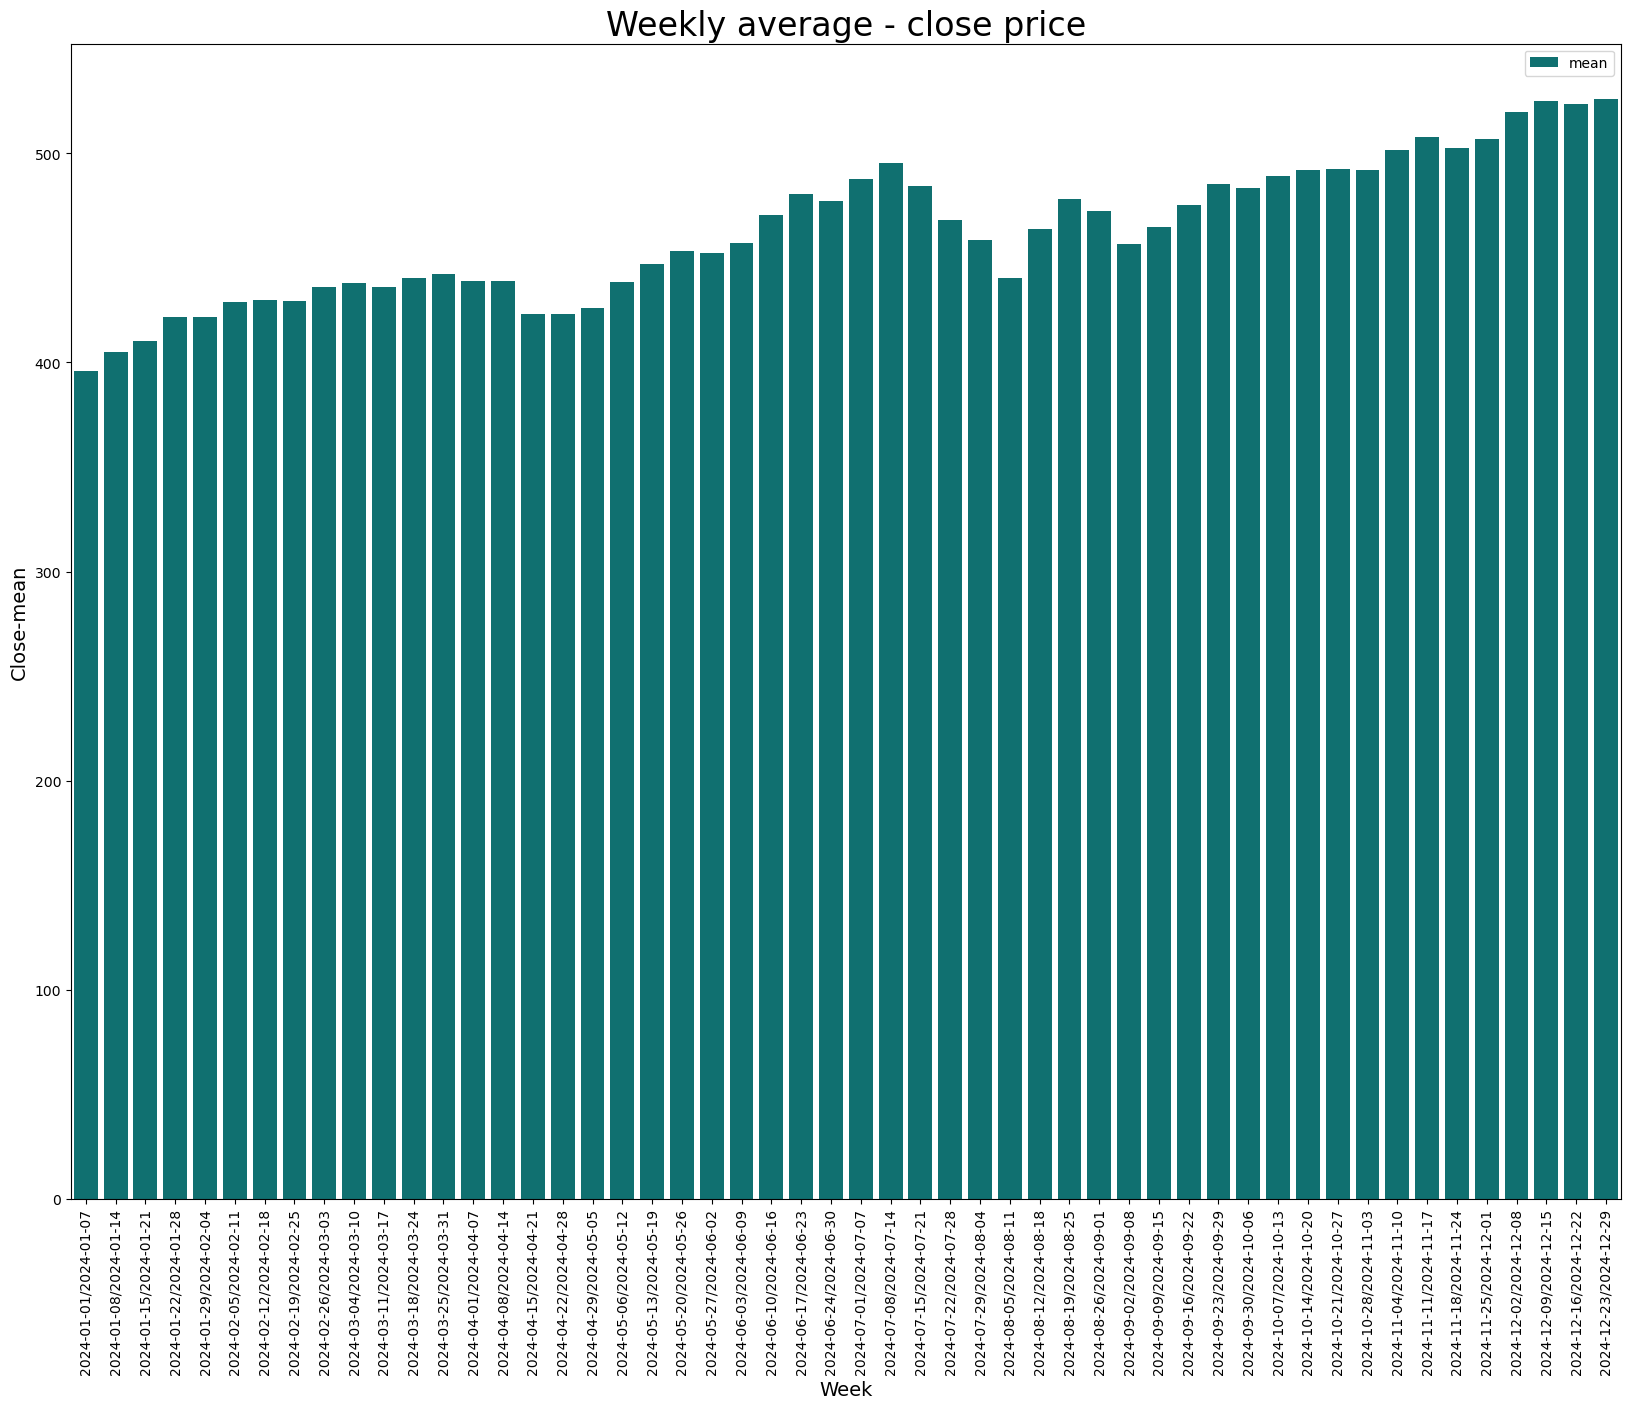

In [ ]:
plt.subplots(figsize=(20,15))
plt.title('Weekly average - close price',fontsize=24)
sns.barplot(x='week_p',y='mean' , data = close_week , color= 'teal',label = 'mean')
plt.xlabel('Week',fontsize=14)
plt.ylabel('Close-mean',fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#4.2

In [ ]:
qqq['Close'].max()
#או : qqq.describe()['Close'][['max']]

537.3035888671875

In [ ]:
qqq['Close'].idxmax()

Timestamp('2024-12-16 00:00:00')

In [ ]:
qqq.loc[['2024-12-16'],['Close']]

Price,Close
Date,
2024-12-16,537.303589


In [ ]:
qqq['Close'].min()

393.93896484375

In [ ]:
qqq['Close'].idxmin()

Timestamp('2024-01-04 00:00:00')

In [ ]:
qqq.loc[['2024-01-04'],['Close']]

Price,Close
Date,
2024-01-04,393.938965


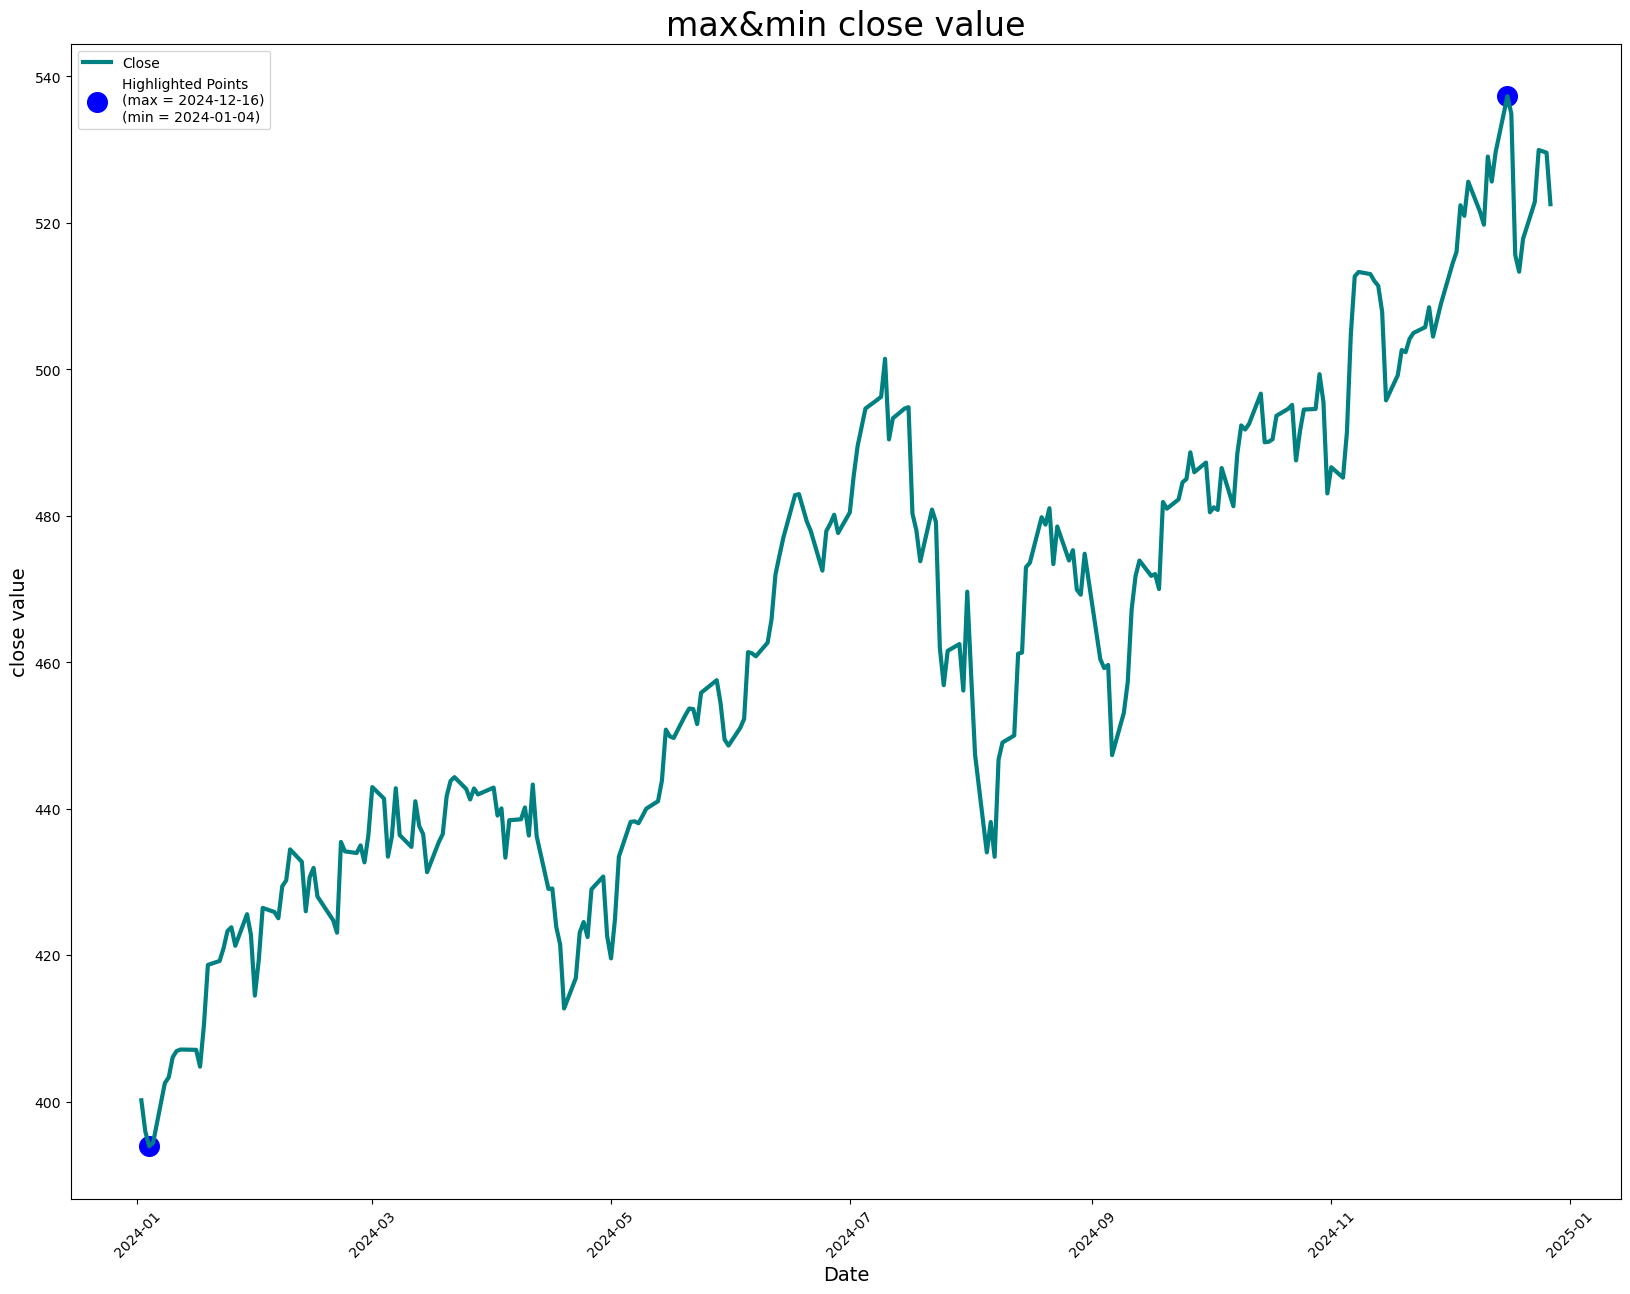

In [ ]:
plt.subplots(figsize=(20,15))
plt.title('max&min close value',fontsize=24)
sns.lineplot(x='Date',y='Close' , data = qqq , linewidth=3, color= 'teal',label = 'Close')
plt.xlabel('Date',fontsize=14)
plt.ylabel('close value',fontsize=14)
plt.xticks(rotation=45)
highlight_dates = ['2024-01-04', '2024-12-16']
highlight_values = qqq.loc[highlight_dates, 'Close']
plt.scatter(highlight_dates, highlight_values, color='blue', s=200, label=f'Highlighted Points\n(max = 2024-12-16)\n(min = 2024-01-04)')
plt.legend()
plt.show()

In [ ]:
#4.3

In [ ]:
qqq.describe()['Close'][['mean']]

mean    462.83863
Name: Close, dtype: float64

In [ ]:
group_day.describe()['Close'][['mean']]

,mean
day of week,
0,465.258338
1,462.560074
2,460.794056
3,461.692576
4,464.020790


In [ ]:
close_d_mean = group_day.describe()['Close'][['mean']]

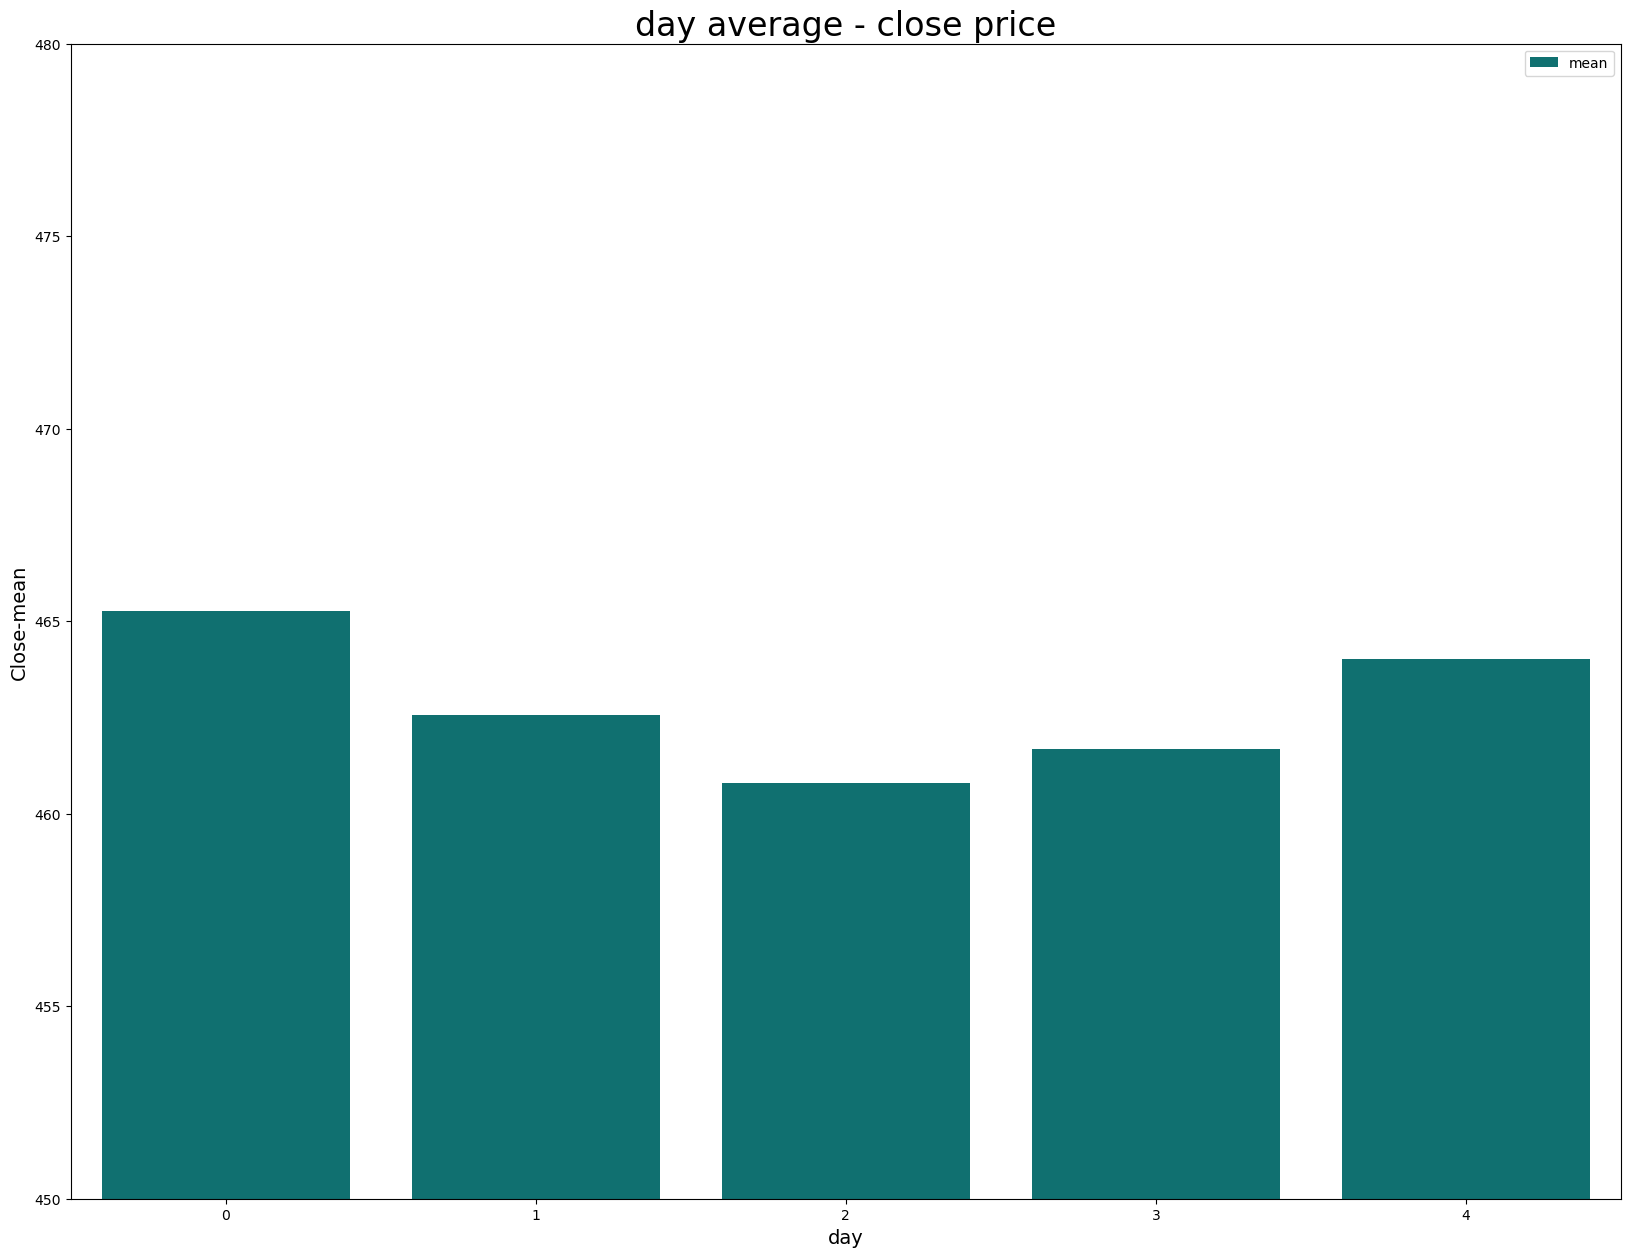

In [ ]:
plt.subplots(figsize=(20,15))
plt.title('day average - close price',fontsize=24)
sns.barplot(x='day of week',y='mean' , data = close_d_mean , color= 'teal',label = 'mean')
plt.ylim(450,480)
plt.xlabel('day',fontsize=14)
plt.ylabel('Close-mean',fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [ ]:
group_month.describe()['Close'][['mean']]

,mean
month_p,
2024-01,410.634978
2024-02,429.803322
2024-03,439.267816
2024-04,430.651947
2024-05,444.750979
2024-06,471.006947
2024-07,480.819275
2024-08,462.782381
2024-09,472.026529


In [ ]:
close_m_mean = group_month.describe()['Close'][['mean']]

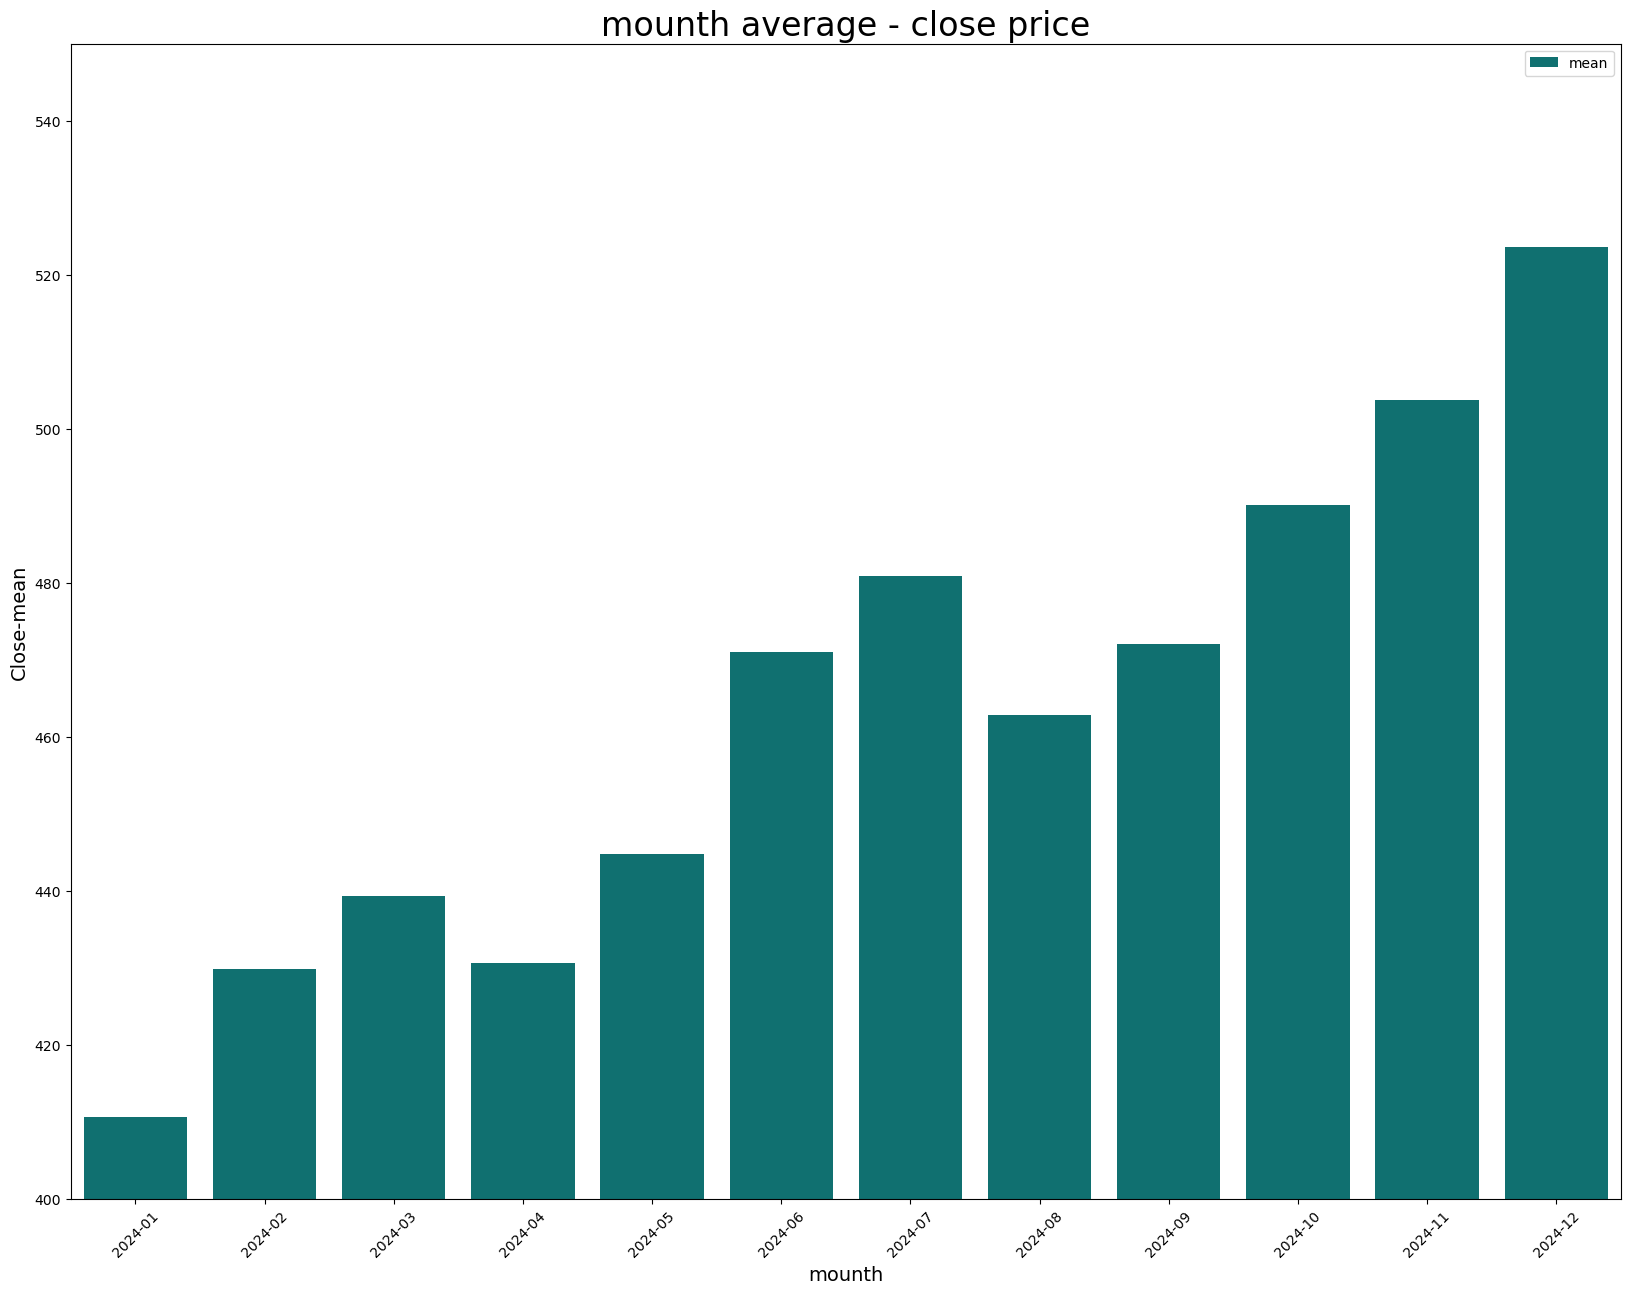

In [ ]:
plt.subplots(figsize=(20,15))
plt.title('mounth average - close price',fontsize=24)
sns.barplot(x='month_p',y='mean' , data = close_m_mean , color= 'teal',label = 'mean')
plt.ylim(400,550)
plt.xlabel('mounth',fontsize=14)
plt.ylabel('Close-mean',fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#4.4

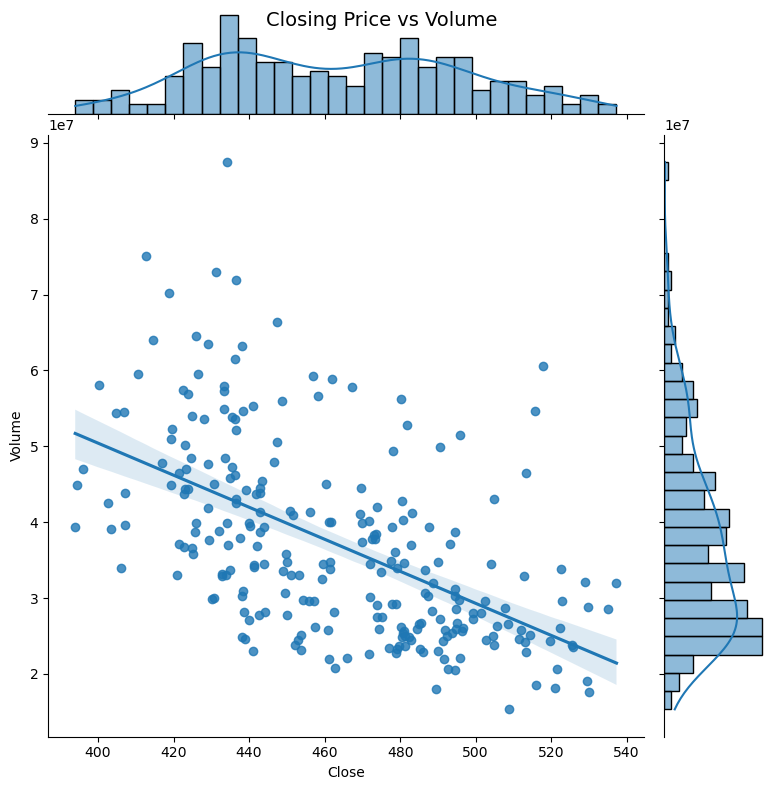

In [ ]:
sns.jointplot(x='Close', y='Volume', data=qqq, kind='reg',height=8,ratio=5,
    marginal_kws={'bins': 30, 'fill': True})
plt.suptitle('Closing Price vs Volume', fontsize=14)
plt.show()

In [ ]:
#4.5

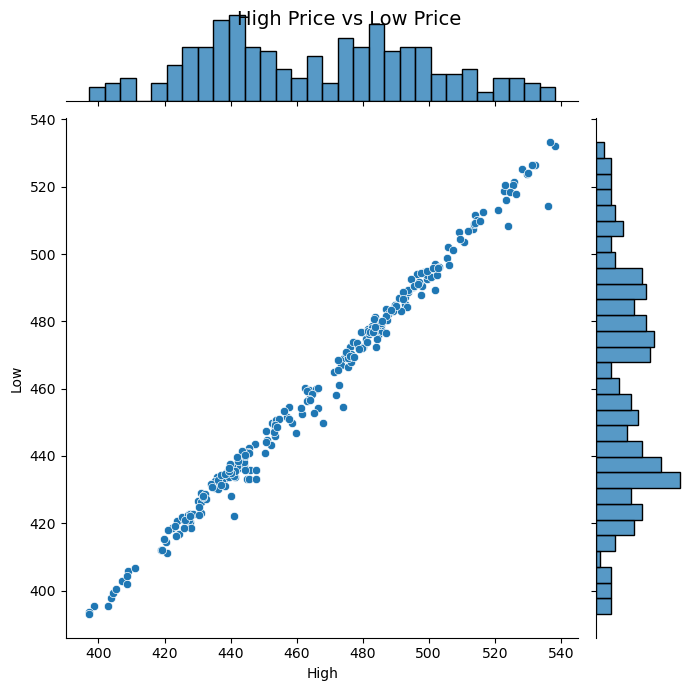

In [ ]:
sns.jointplot(x='High', y='Low', data=qqq, kind='scatter',height=7,ratio=5,
    marginal_kws={'bins': 30, 'fill': True})
plt.suptitle('High Price vs Low Price', fontsize=14)
plt.show()